In [1]:
import pandas as pd

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

#### Load causal algorithms from the py-causal library and Run FOFC Continuous

In [4]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.getAlgorithmParameters(algoId = 'fofc')

alpha: Statistical tests often compare a test statistic to a distribution and make a judgment that the null hypothesis has been rejected based on whether the area in the tails for the distribution for that test statistic is greater than some cutoff alpha. For tests of independence, for instance, a lower alpha level makes it easier to judge independence, and a higher alpha makes it harder to judge independence. Thus, a lower alpha for a search generally results in a sparser graph. The default for this is 0.01, though for discrete searches we recommend using a value of 0.05. (java.lang.Double) [default:0.01]
useWishart: This is a parameter for the FOFC (Find One Factor Clusters) algorithm. There are two tests implemented there for testing for tetrads being zero, Wishart and Delta. This parameter picks which of these tests should be use: ‘Yes’ for Wishart and ‘No’ for Delta. (java.lang.Boolean) [default:false]
useGap: This is a parameter for FOFC (Find One Factor Clusters). There are two 

In [5]:
tetrad.run(algoId = 'fofc', dfs = df, alpha = 0.01, useWishart = False, useGap = False, 
           include_structure_model = False, verbose = True)

#### FOFC Continuous' Result's Nodes

In [6]:
tetrad.getNodes()

['TangibilityCondition',
 'AmountDonated',
 'Sympathy',
 'Imaginability',
 'Impact',
 '_L1']

#### FOFC Continuous' Result's Edges

In [7]:
tetrad.getEdges()

['_L1 --> AmountDonated',
 '_L1 --> Imaginability',
 '_L1 --> Sympathy',
 '_L1 --> Impact']

#### Plot The Result's Graph

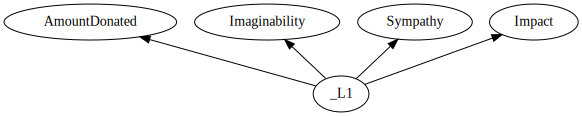

In [8]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

#### Stop Java VM

In [9]:
pc.stop_vm()